# Task
Load the dataset "heart.csv", explore it, preprocess it, transform it, and perform exploratory data analysis (EDA).

## Load the data

### Subtask:
Load the healthcare data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset into a dataframe.



In [1]:
import pandas as pd

df = pd.read_csv('/content/heart (4).csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Explore the data

### Subtask:
Display the first few rows, check data types, and look for missing values.


**Reasoning**:
Display the first few rows, check data types, and look for missing values in the DataFrame.



In [2]:
display(df.head())
df.info()
display(df.isnull().sum())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


## Pre-process the data

### Subtask:
Handle missing values, and address any data type issues if necessary.


## Transform the data

### Subtask:
Apply any necessary transformations based on the data characteristics and analysis goals. This step might involve encoding categorical variables or scaling numerical features.


In [5]:
# Print the column names of the features DataFrame to identify correct names
print(features.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')


In [7]:
# Correct the categorical features list based on the actual column names
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Create a pipeline that first preprocesses the data and then could include a model
# For this subtask, we only perform the preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the transformations to the features
X_transformed = pipeline.fit_transform(features)

# Display the shape of the transformed data
print("Shape of original features:", features.shape)
print("Shape of transformed features:", X_transformed.shape)

Shape of original features: (303, 13)
Shape of transformed features: (303, 30)


## Perform eda

### Subtask:
Conduct exploratory data analysis to understand the data distribution, relationships between variables, and identify potential insights. This might involve creating visualizations like histograms, scatter plots, and box plots.


**Reasoning**:
Generate histograms and box plots for numerical features and count plots for categorical features to understand their distributions and identify outliers.



Histograms of numerical features:


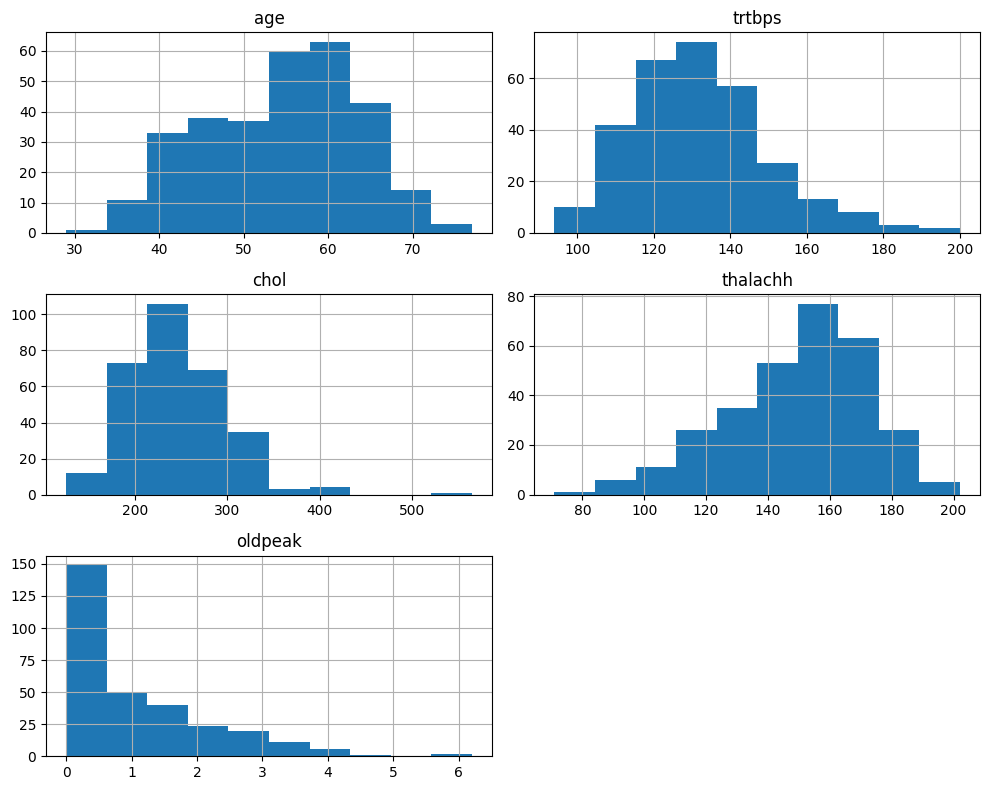


Box plots of numerical features:


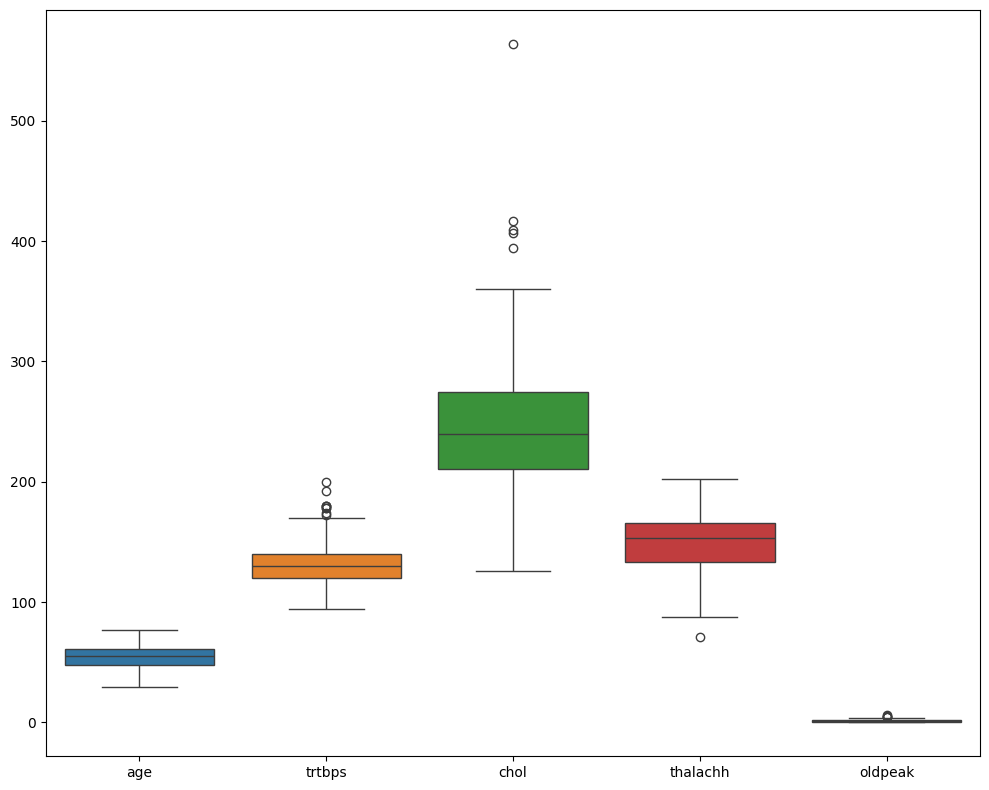


Count plots of categorical features:


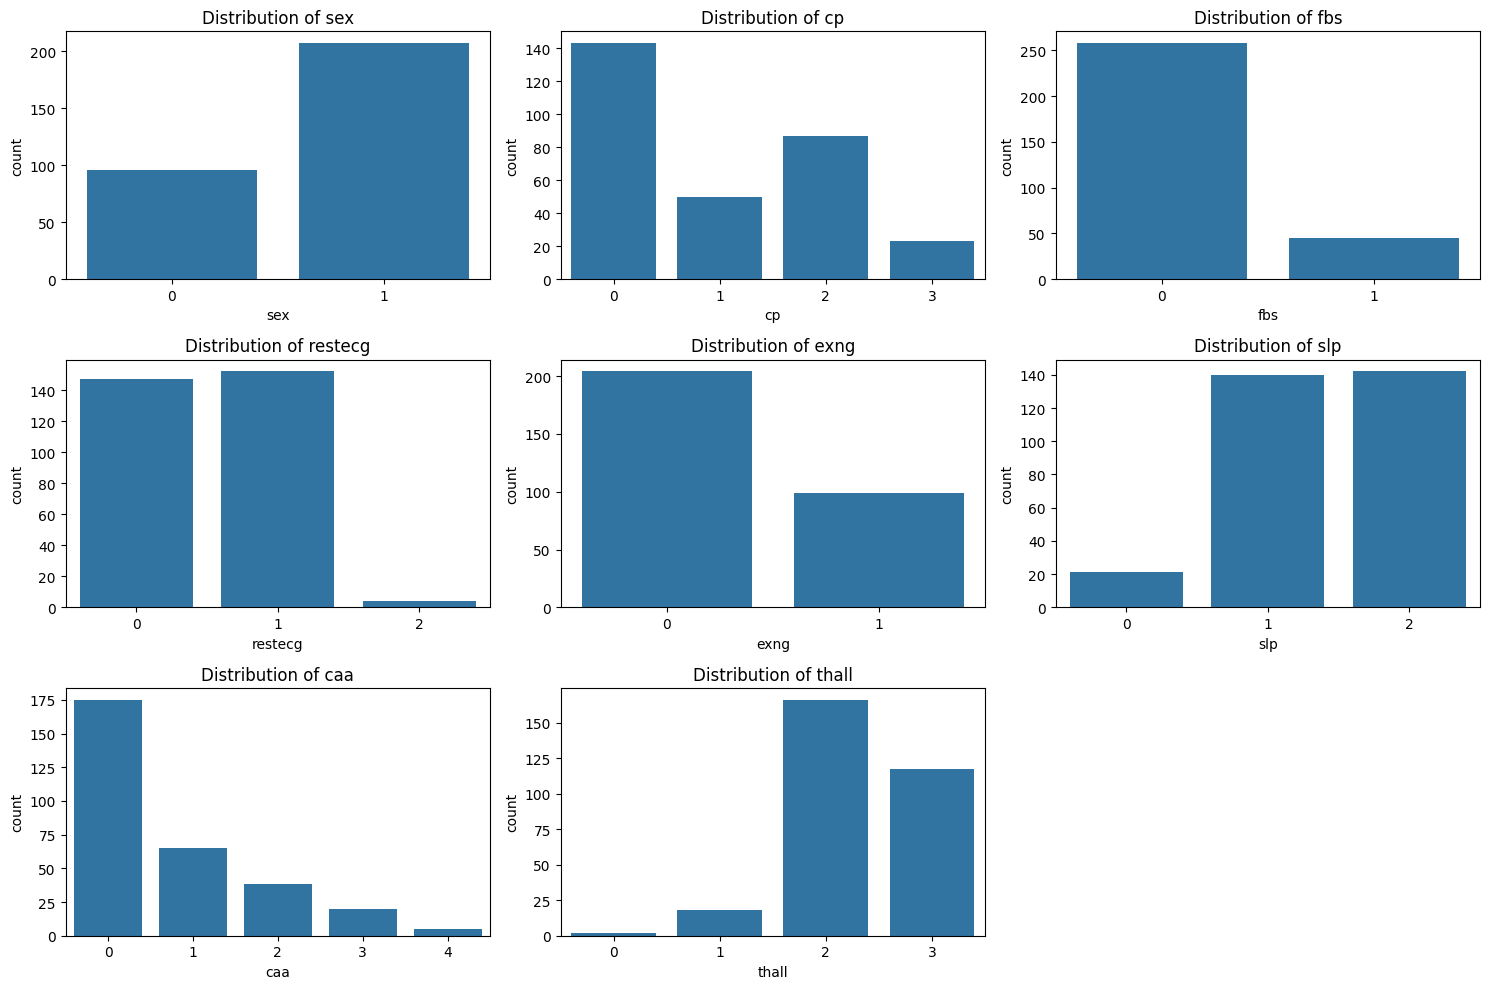

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Histograms for numerical features
print("Histograms of numerical features:")
features[numerical_features].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Box plots for numerical features
print("\nBox plots of numerical features:")
plt.figure(figsize=(10, 8))
sns.boxplot(data=features[numerical_features])
plt.tight_layout()
plt.show()

# Count plots for categorical features
print("\nCount plots of categorical features:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=features)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Reasoning**:
Create a heatmap of the correlation matrix for numerical features and explore the relationship between relevant features and the target variable.



Correlation matrix of numerical features:


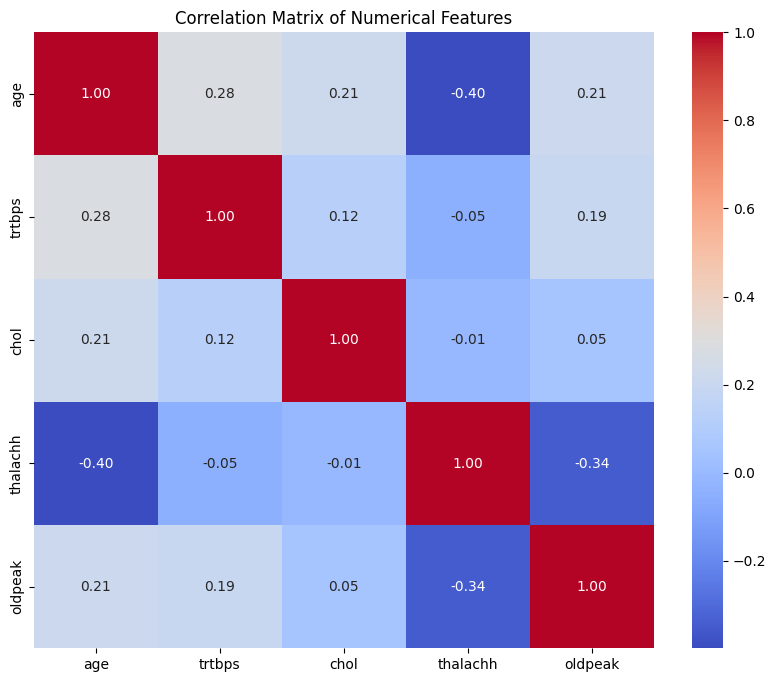


Relationship between numerical features and target variable:


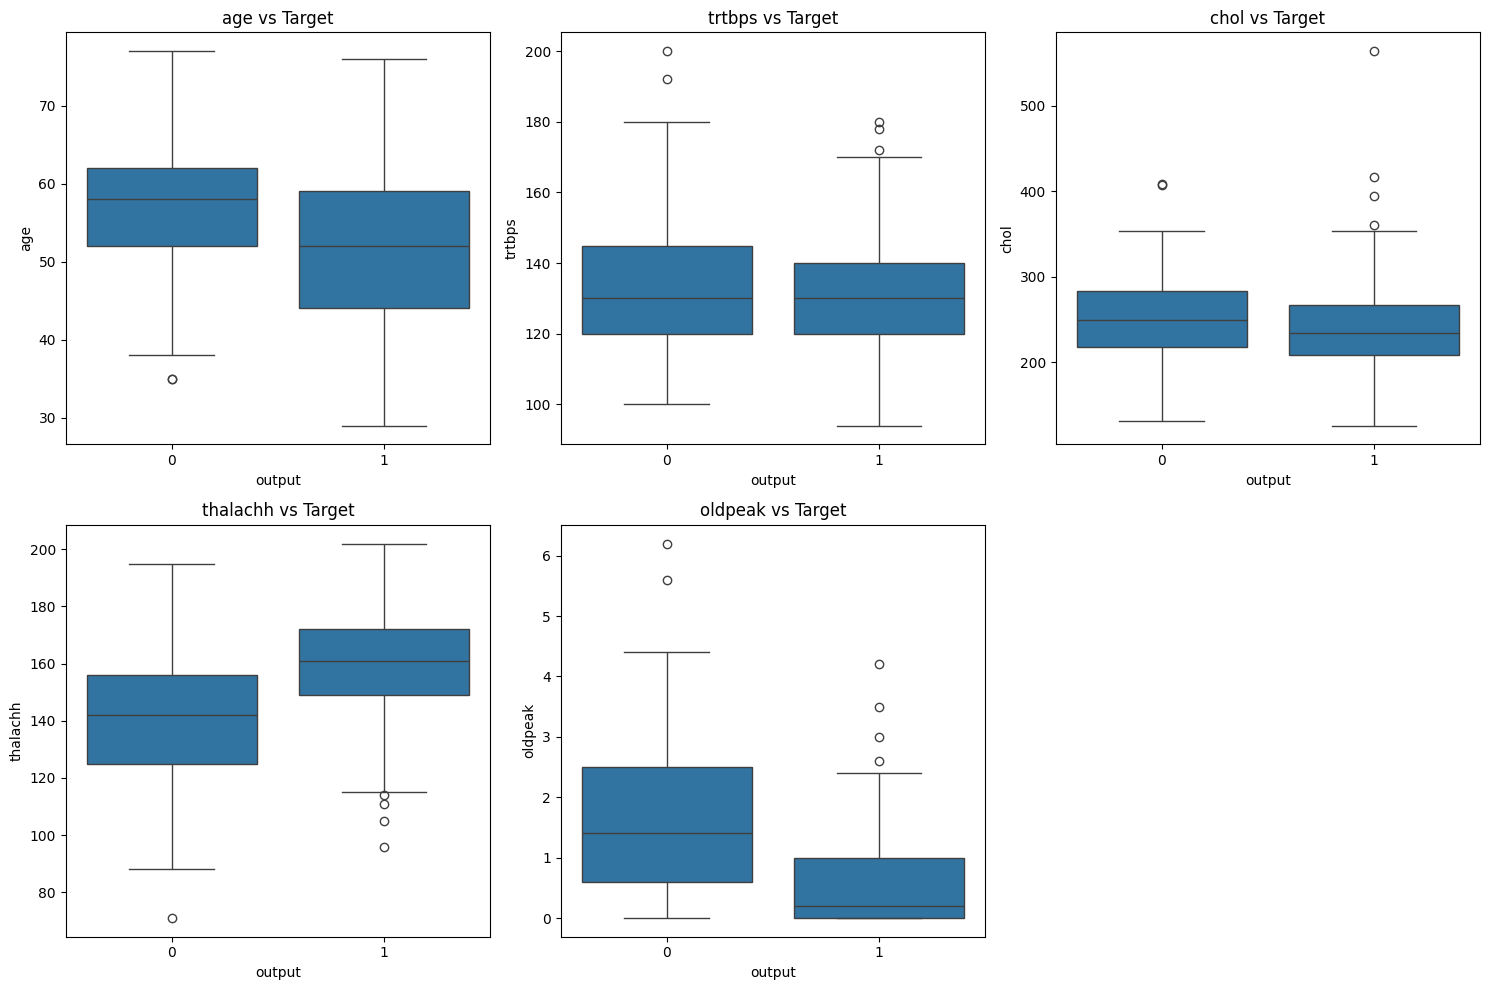


Relationship between categorical features and target variable:


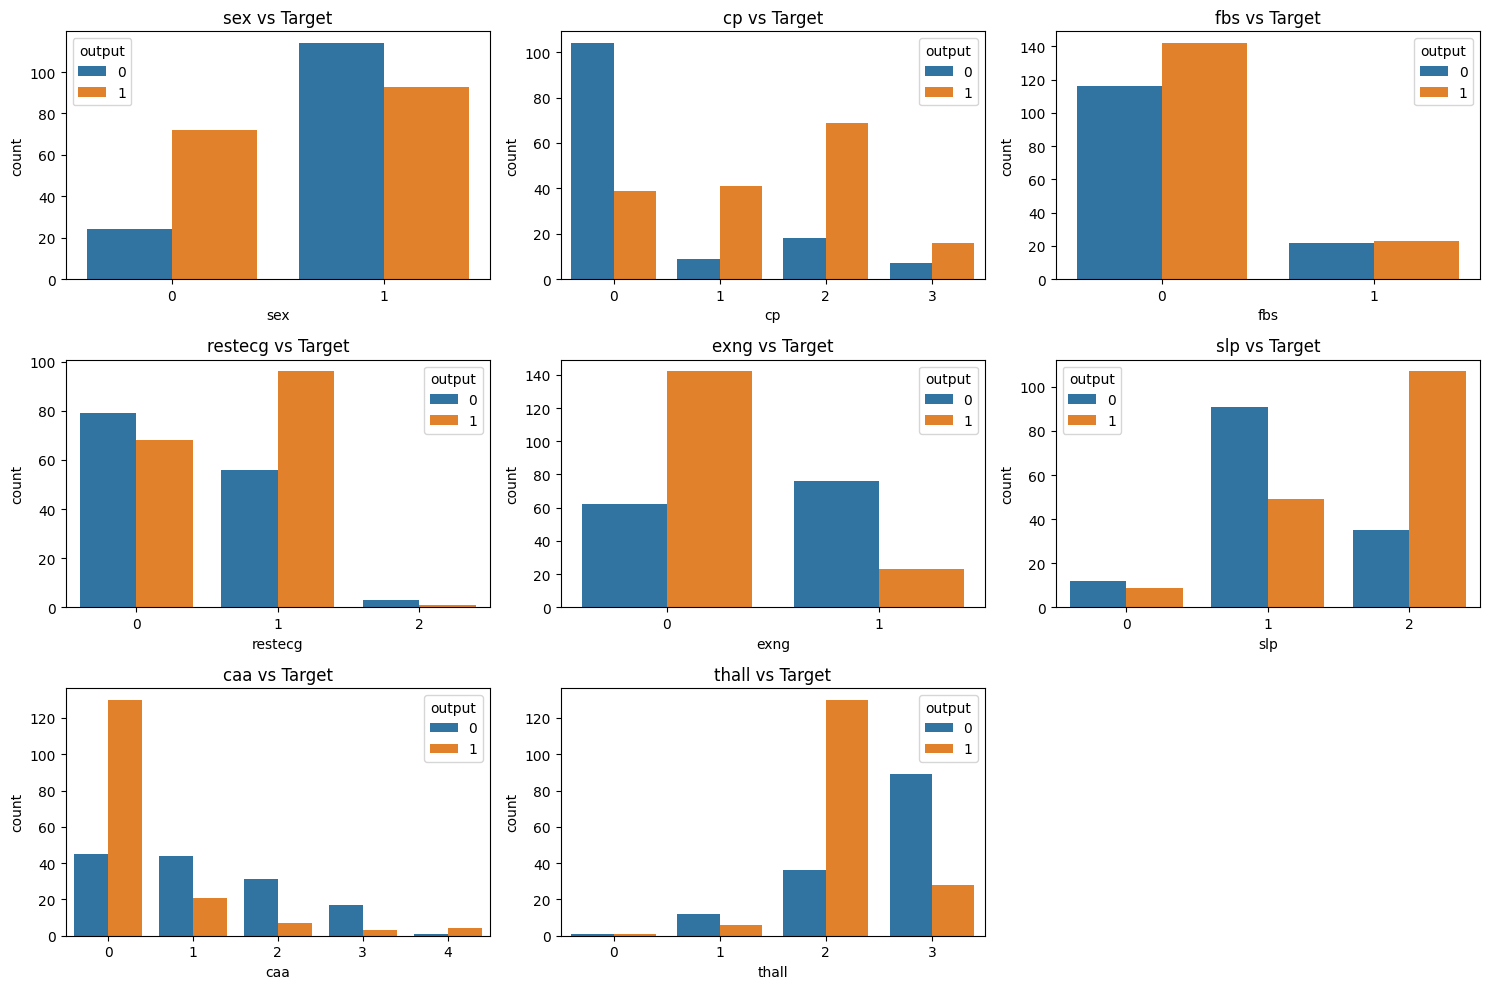

In [9]:
# Correlation heatmap for numerical features
print("Correlation matrix of numerical features:")
plt.figure(figsize=(10, 8))
sns.heatmap(features[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Relationship between numerical features and the target variable
print("\nRelationship between numerical features and target variable:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()

# Relationship between categorical features and the target variable
print("\nRelationship between categorical features and target variable:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, hue=target, data=df)
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()

## Summarize findings

### Subtask:
Provide a summary of the data characteristics, preprocessing steps, transformations applied, and key findings from the EDA.


## Summary:

### Data Analysis Key Findings

*   The dataset "heart.csv" contains 303 entries and 14 columns.
*   There were no missing values in the dataset.
*   The dataset consists of both numerical and categorical features.
*   Numerical features were scaled using `StandardScaler`.
*   Categorical features were one-hot encoded using `OneHotEncoder`, increasing the number of feature columns from 13 to 30.
*   Exploratory Data Analysis (EDA) revealed varying distributions for numerical features, with potential outliers in 'trtbps', 'chol', and 'thalachh'.
*   EDA also showed associations between certain categorical features (like 'cp', 'exng', 'slp', 'caa', and 'thall') and the target variable, as well as differences in numerical feature distributions across the target classes (e.g., 'thalachh' distribution varied with the target).

### Insights or Next Steps

*   The dataset is clean with no missing values, which simplifies the preprocessing steps.
*   The transformations applied (scaling and one-hot encoding) have prepared the data for use in machine learning models. Further analysis could involve feature selection based on the EDA findings to potentially improve model performance.
